In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задача 1**

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [2]:
salary = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]
df = pd.DataFrame(salary, columns = ['salary'])
df[:3]

,salary
0,100
1,80
2,75


In [3]:
# Рассчитаем среднее арифметическое

In [4]:
mean_salary = df['salary'].sum() / df['salary'].count()
mean_salary, mean_salary == df.mean()[0]

(65.3, True)

In [5]:
# Рассчитаем среднее квадратичное отклонение

In [6]:
std_salary = np.sqrt(((df['salary'] - (df['salary'].sum() / df['salary'].count())) ** 2).sum() / df['salary'].count())
std_salary, round(std_salary, 10) == round(df.std(ddof=0)[0], 10)

(30.823854398825596, True)

In [7]:
# Рассчитаем смещенную дисперсию

In [8]:
var_salary = ((df['salary'] -  (df['salary'].sum() / df['salary'].count())) ** 2).sum() / df['salary'].count()
var_salary, round(var_salary, 10) == round(df.var(ddof=0)[0], 10)

(950.11, True)

In [9]:
# Рассчитаем несмещенную дисперсию

In [10]:
var_salary = ((df['salary'] -  (df['salary'].sum() / df['salary'].count())) ** 2).sum() / (df['salary'].count() - 1)
var_salary, round(var_salary, 10) == round(df.var(ddof=1)[0], 10)

(1000.1157894736842, True)

**Задача 2**

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [11]:
# первый квартиль
q1 = np.quantile(df['salary'], q=0.25)
q1

42.0

In [12]:
# второй квартиль
q3 = np.quantile(df['salary'], q=0.75)
q3

81.0

In [13]:
# интерквартильное расстояние
iqr = q3 - q1
iqr

39.0

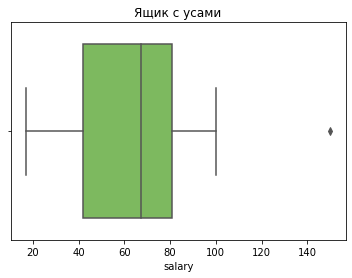

In [14]:
boxplot = sns.boxplot(x=df['salary'], palette=['#78C850'])
boxplot.axes.set_title("Ящик с усами")
plt.show()

In [15]:
# усы
[q1 - 1.5 * iqr, q3 + 1.5 * iqr]

[-16.5, 139.5]

In [16]:
# Выброс
df.loc[df['salary'] > 139.5, 'salary']

19    150
Name: salary, dtype: int64

**Задача 3**

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

In [22]:
# Вероятность того, что студент факультета A сдаст первую сессию
p_A=0.8

# Вероятность того, что студент факультета B сдаст первую сессию
p_B=0.7

# Вероятность того, что студент факультета C сдаст первую сессию
p_C=0.9

In [23]:
# Вероятность того, что случайный студент из факультета A
q_A = 0.25

# Вероятность того, что случайный студент из факультета B
q_B = 0.25

# Вероятность того, что случайный студент из факультета С
q_C = 0.5

In [24]:
# Доля сдавших студентов от общего количества поступивших
p_t = q_A * p_A + q_B * p_B + q_C * p_C

In [25]:
def my_print(A, q_A, p_A, p_t):
    
    P = q_A * p_A / p_t
    
    return "Вероятность, что студент учится на факультете %s составляет %.2f" % (A, P)

In [26]:
print(my_print(A='A', q_A=q_A, p_A=p_A, p_t=p_t))
print(my_print(A='B', q_A=q_B, p_A=p_B, p_t=p_t))
print(my_print(A='C', q_A=q_C, p_A=p_C, p_t=p_t))

Вероятность, что студент учится на факультете A составляет 0.24
Вероятность, что студент учится на факультете B составляет 0.21
Вероятность, что студент учится на факультете C составляет 0.55
